<a href="https://colab.research.google.com/github/dmswn1004/Python_Data-visualization/blob/main/20_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

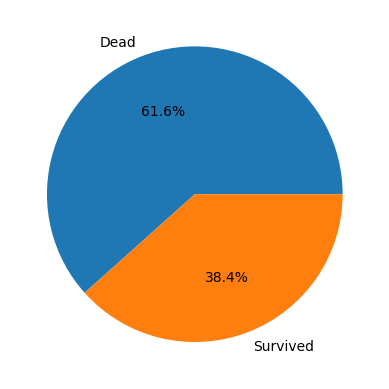

In [ ]:
labels=['Dead', 'Survived']
plt.pie(titanic['survived'].value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

In [ ]:
male_surv = len(titanic.loc[(titanic['sex']=='male')& (titanic['survived']==1)]) / len(titanic.loc[(titanic['sex']=='male')])
round(male_surv * 100, 2)

18.89

In [ ]:
female_surv = len(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==1)]) / len(titanic.loc[(titanic['sex']=='female')])
round(female_surv * 100, 2)

74.2

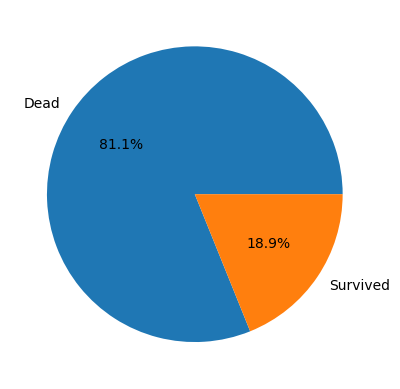

In [ ]:
male_data = [len(titanic.loc[(titanic['sex']=='male') & (titanic['survived']==0)]),
             len(titanic.loc[(titanic['sex']=='male') & (titanic['survived']==1)])]
labels=['Dead', 'Survived']
plt.pie(male_data, labels=labels, autopct='%.1f%%')
plt.show()

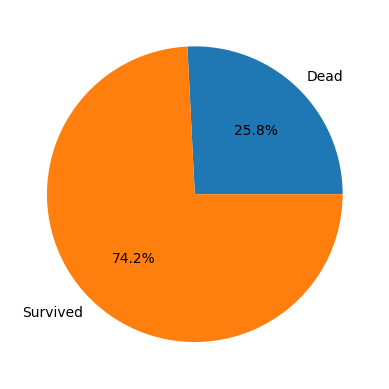

In [ ]:
female_data = [len(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==0)]),
             len(titanic.loc[(titanic['sex']=='female') & (titanic['survived']==1)])]
labels=['Dead', 'Survived']
plt.pie(female_data, labels=labels, autopct='%.1f%%')
plt.show()

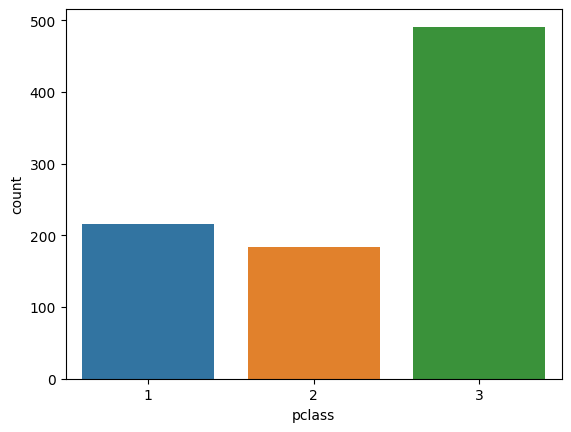

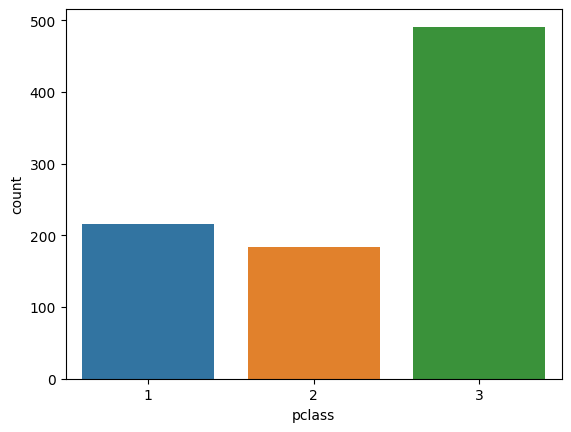

In [ ]:
sns.countplot(x='pclass', data=titanic)
plt.show()

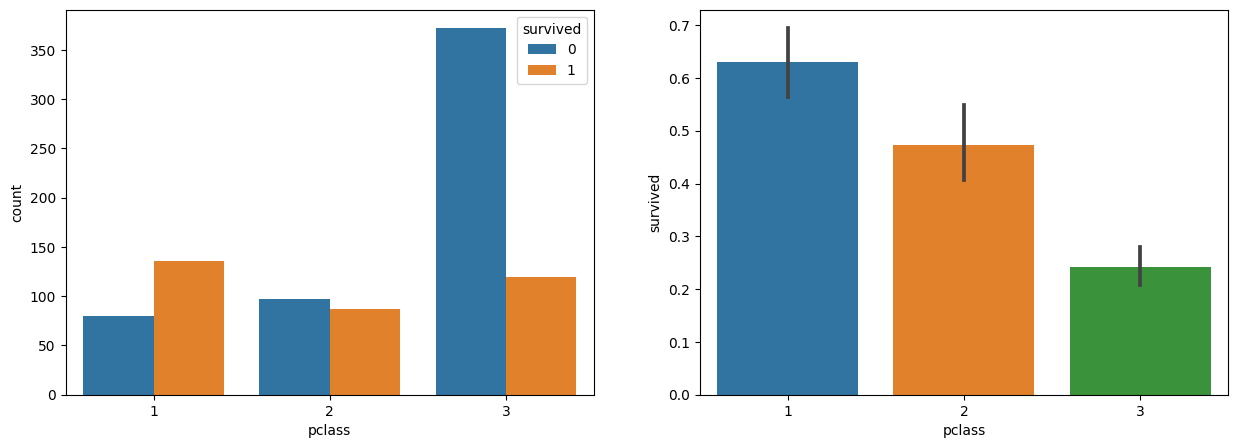

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='pclass', data=titanic, hue='survived', ax=ax[0])
sns.barplot(x='pclass', y='survived', data=titanic, ax=ax[1])
plt.show()

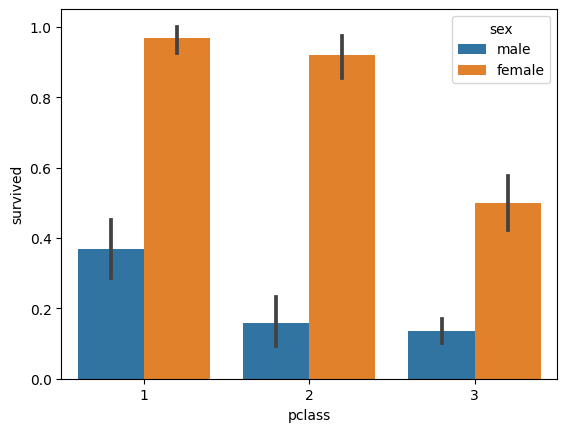

In [ ]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic)
plt.show()

In [ ]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

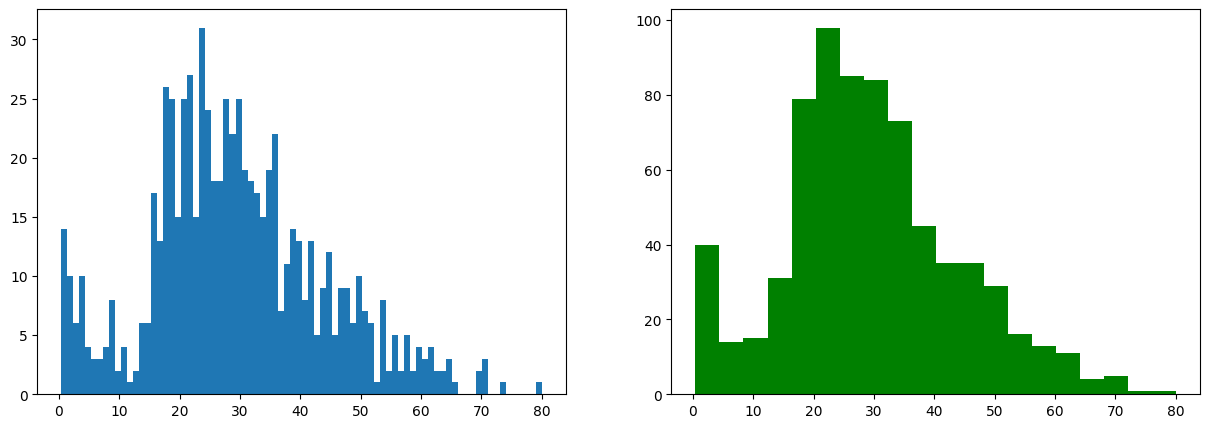

In [ ]:
age_data=titanic['age']

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].hist(age_data, bins=80)
ax[1].hist(age_data, bins=20, color='g')
plt.show()

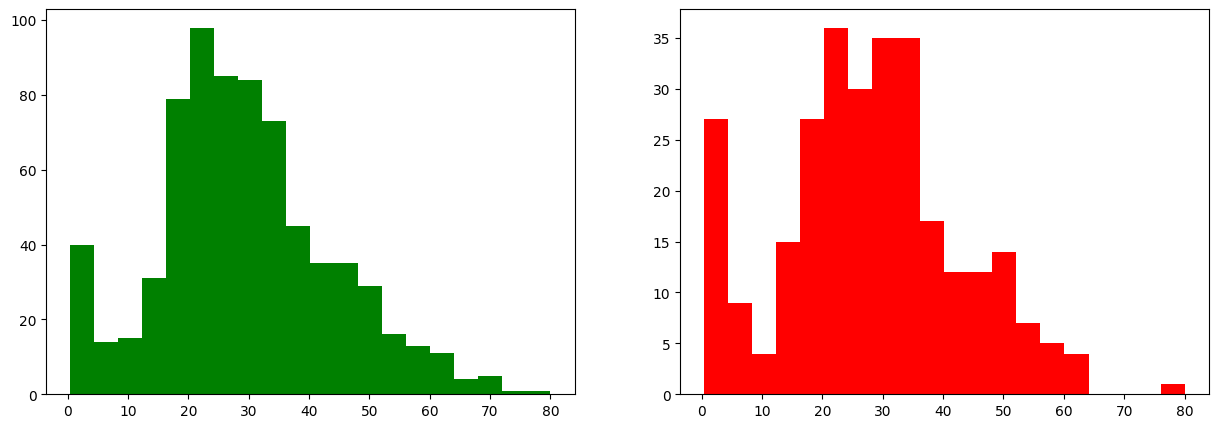

In [ ]:
age_surv_data=titanic[titanic['survived']==1]['age']

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].hist(age_data, bins=20, color='g')
ax[1].hist(age_surv_data, bins=20, color='r')
plt.show()

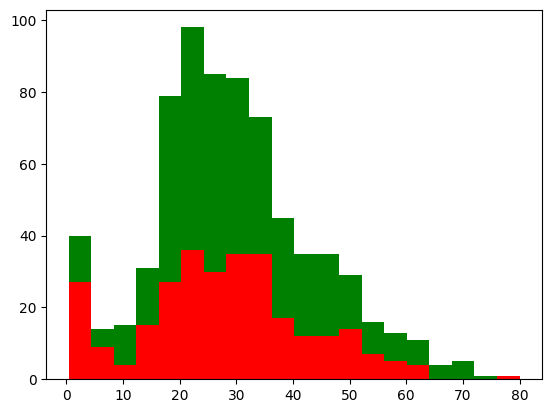

In [ ]:
plt.hist(age_data, bins=20, color='g')
plt.hist(age_surv_data, bins=20, color='r')

plt.show()

In [ ]:
titanic.groupby(['pclass','sex'])['age'].mean()

pclass  sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: age, dtype: float64

In [ ]:
titanic['age'].fillna(titanic.groupby(['pclass','sex'])['age'].transform('mean'), inplace=True)
titanic['age'].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: age, dtype: float64